In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp

In [2]:
fake_news = pd.read_csv('Fake.csv')
real_news = pd.read_csv('True.csv')

fake_news.head()
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Exploratory Data Analysis

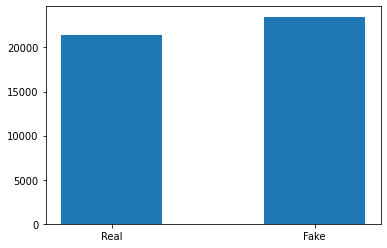

In [10]:
real_count = len(real_news)
fake_count = len(fake_news)
data_dict = {'Real':real_count, 'Fake':fake_count}
type = list(data_dict.keys())
count = list(data_dict.values())

plt.bar(type, count, width = 0.5)
plt.show()

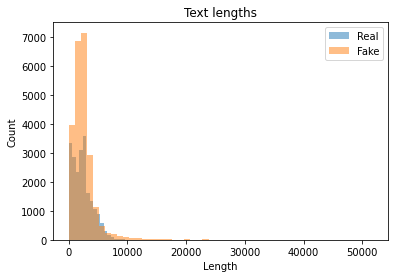

In [8]:
len_real = real_news['text'].apply(len)
len_fake = fake_news['text'].apply(len)

plt.hist(len_real, bins = 50, alpha = 0.5, label = 'Real')
plt.hist(len_fake, bins = 50, alpha = 0.5, label = 'Fake')
plt.title('Text lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

Length of texts are highly variable with some being very short (< 1000) and some being rather long (> 40000)

In [19]:
# Download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/km/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/km/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def most_common_words(txt, n):
    all_words = []
    for text in txt:
        all_words.extend(nltk.word_tokenize(text.lower()))
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(n)

real_most_common = most_common_words(real_news['text'], 10)
fake_most_common = most_common_words(fake_news['text'], 10)

print('Real:', real_most_common)
print('Fake:', fake_most_common)

Real: [('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515)]
Fake: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


- Most common words in real and fake news centre around politics and trump.
- Fake news contain more references to clinton and has a greater use of words like 'like'

Text Preprocessing
- Lowercase text
- Remove punctuations and digits
- Remove stopwords
- Stemming/Lemmatizing text

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/km/nltk_data...


True

In [21]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def txt_preprocessor(text):
    # Lowercase text
    text = text.lower()

    # Remove punctuations and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Stemming/Lemmatizing
    words = [stemmer.stem(word) for word in words]
    text = ''.join(words)

    return text

real_news['text'] = real_news['text'].apply(txt_preprocessor)
fake_news['text'] = fake_news['text'].apply(txt_preprocessor)

Model Training

In [ ]:
vectorizer = CountVectorizer()